#Verilerin alınması

In [ ]:
#bilgisayara indirmesini bekleyip tekrar collaba yüklemesini beklemekle aynı işlevi görüyo sadece daha hızlı
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-08-28 10:32:41--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.117.233.21, 2600:1409:9800:98c::317f, 2600:1409:9800:984::317f
Connecting to download.microsoft.com (download.microsoft.com)|104.117.233.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   198MB/s    in 4.3s    

2022-08-28 10:32:45 (185 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip kagglecatsanddogs_5340.zip

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  
  i

In [ ]:
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os,shutil
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, BatchNormalization, Dense, Activation, Flatten, MaxPooling2D
import warnings
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from keras import Sequential
from tensorflow.keras.applications import ResNet50


In [ ]:
#label olarak cat için 1, dog için 0 kullanıyoruz classify edebilmek için
paths = []
labels = []

from PIL import Image

for types in os.listdir("PetImages"):
  for path in os.listdir("PetImages/" + types):
    try:
      the_path = "PetImages/" + types + "/" + path
      img = Image.open(the_path) #resmi açmayı dene
      img.verify() # doğrula resim olup olmadığını
      if types == "Dog":
        labels.append("0")
      else:
        labels.append("1")
      paths.append(os.path.join("PetImages/", types, path))
    except (IOError, SyntaxError) as e:
      print('Bad file:', path) # bozuk olanların ismini printle

Bad file: Thumbs.db
Bad file: 11702.jpg


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Bad file: Thumbs.db
Bad file: 666.jpg


In [ ]:
len(labels) #elimizdeki veri sayısı

24998

In [ ]:
#elimizdeki etiketleri ve yolları panda veri setine çevirmek
df = pd.DataFrame()
df["img"] = paths
df["types"] = labels
#bütün cat ler ve dog ların peşpeşe olmaması için karıştırıyoruz
df = df.sample(frac=1).reset_index(drop=True)
df.head(20)

,img,types
0,PetImages/Dog/5135.jpg,0
1,PetImages/Cat/7070.jpg,1
2,PetImages/Cat/4220.jpg,1
3,PetImages/Dog/6098.jpg,0
4,PetImages/Cat/167.jpg,1
5,PetImages/Dog/3567.jpg,0
6,PetImages/Dog/2560.jpg,0
7,PetImages/Dog/8464.jpg,0
8,PetImages/Cat/7607.jpg,1
9,PetImages/Cat/4898.jpg,1


In [ ]:
from sklearn.model_selection import train_test_split

# 20% test set
train, test = train_test_split(df, test_size=0.2, random_state=42)
train.shape, test.shape

((19998, 2), (5000, 2))

In [ ]:
class_mode="categorical"
train_datagen = ImageDataGenerator(
    rescale = 1./255,  #fotoğrafları normalize ederek 0 ve 1 arasında değerler vermek
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_dataframe(
  dataframe=train,
  directory=None,
  x_col="img",
  y_col="types",
  subset="training",
  batch_size=128,
  seed=42,
  shuffle=True,
  class_mode=class_mode,
  target_size=(128,128))

valid_generator = train_datagen.flow_from_dataframe(
  dataframe=train,
  directory=None,
  x_col="img",
  y_col="types",
  subset="validation",
  batch_size=128,
  seed=42,
  shuffle=True,
  class_mode=class_mode,
  target_size=(128,128))

test_datagen = ImageDataGenerator (rescale=1./255.)

test_generator = test_datagen.flow_from_dataframe(
  dataframe=test,
  directory=None,
  x_col="img",
  y_col="types", 
  batch_size=128,
  seed=42,
  shuffle=False,
  class_mode=class_mode,
  target_size=(128,128))


Found 15999 validated image filenames belonging to 2 classes.
Found 3999 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
x, y = zip(*(valid_generator[i] for i in range(len(valid_generator))))

x_val = np.vstack(x)
y_val = np.vstack(y)

In [ ]:
x, y = zip(*(train_generator[i] for i in range(len(train_generator))))

x_train = np.vstack(x)
y_train = np.vstack(y)

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

In [ ]:
x, y = zip(*(test_generator[i] for i in range(len(test_generator))))

x_test = np.vstack(x)
y_test = np.vstack(y)

In [ ]:
np.save('x_test', x_test)
np.save('y_test', y_test)
np.save('x_val', x_val)
np.save('y_val', y_val)
np.save('x_train', x_train)
np.save('y_train', y_train)

##1. Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os,shutil
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, BatchNormalization, Dense, Activation, Flatten, MaxPooling2D
import warnings
from keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## 2. Dosyaların yüklenmesi

In [ ]:
np.load.__defaults__=(None, True, True, 'ASCII')

#allow pickle true yapmamız gerekiyor

x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
x_val = np.load('x_val.npy')
y_val = np.load('y_val.npy')

np.load.__defaults__=(None, False, True, 'ASCII')

In [ ]:
#After reading the arrays we turn them into tensors
x_train = tf.convert_to_tensor(x_train)
y_train = np.asarray(y_train).astype(np.int_)
y_train = tf.convert_to_tensor(y_train)
x_test = tf.convert_to_tensor(x_test)
y_test = tf.convert_to_tensor(y_test)
x_val = tf.convert_to_tensor(x_val)
y_val = tf.convert_to_tensor(y_val)


#Gerekli şeylerin yüklenmesi

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras.utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=4032efdb2f33f386da6d646d3ccec5a49abd60fab3e9d128810295aa048673ae
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


##3. Modeli Oluşturma

In [ ]:
TEST_SIZE = 0.5
RANDOM_STATE = 2018
BATCH_SIZE = 64
NO_EPOCHS = 20
NUM_CLASSES = 2
RESNET_WEIGHTS_PATH = '/kaggle/input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights=None))
model.add(Dense(2, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23,591,810
Trainable params: 23,538,690
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#building the model
build_model = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, validation_data=(x_val, y_val))

Epoch 1/20
224/250 [=========================>....] - ETA: 7:44 - loss: 3.6861 - accuracy: 0.5097

In [ ]:
#Modelin doğruluk değerleri
score = model.evaluate(x_val, y_val, verbose=0)
print('Validationdan gelen Loss:', score[0])
print('Validationdan gelen Accuracy:', score[1])

Validationdan gelen Loss: 1.4980950355529785
Validationdan gelen Accuracy: 0.7081770300865173


#Test verilerini kullanarak tahmin yapmak

In [ ]:
x_test = x_test.numpy() #x_test i numpy e çeviriyoruz

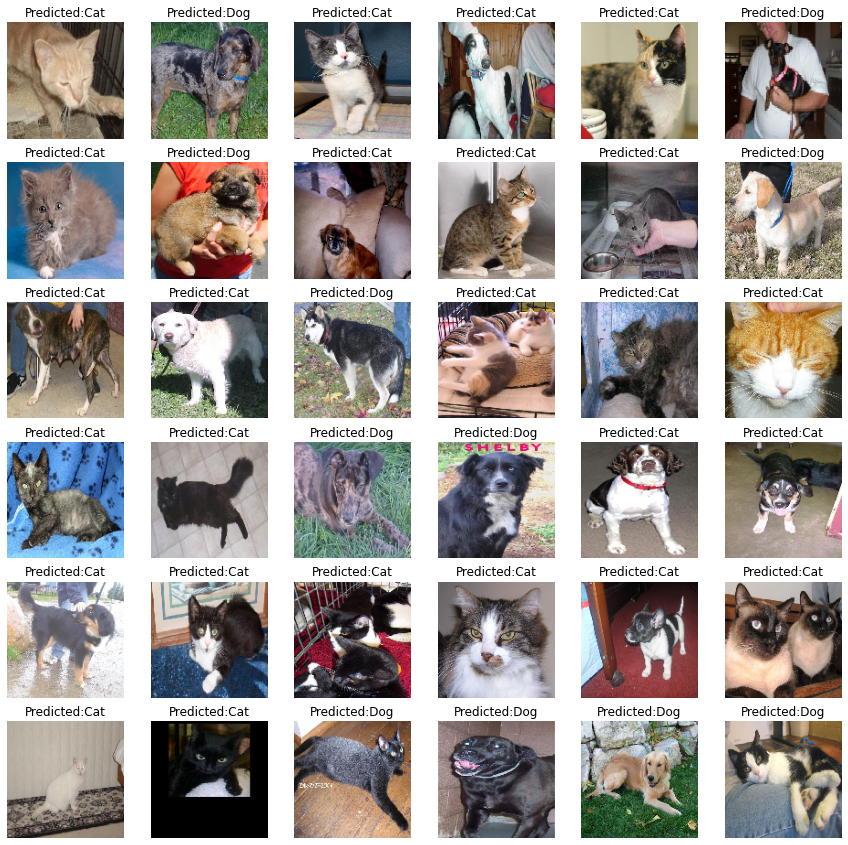

In [ ]:
f, ax = plt.subplots(6,6, figsize=(15,15))

for i,data in enumerate(x_test[72:108]):
    img_data = data
    orig = img_data
    data = img_data.reshape(-1,128,128,3)
    model_out = model.predict([data])

    if np.argmax(model_out) == 0: 
        str_predicted='Dog'
    else: 
        str_predicted='Cat'
    ax[i//6, i%6].imshow(orig)
    ax[i//6, i%6].axis('off')
    ax[i//6, i%6].set_title("Predicted:{}".format(str_predicted))    
plt.show()